In [ ]:
# load packages
library(TCGAbiolinks)
library(dplyr)
library(purrr)
library(dplyr)
library(ggplot2)
library(patchwork)
library(scales)
library(forcats)

In [2]:
# define directory
root_dir <- "../cohorts"

In [3]:
# change directory
setwd(root_dir)
print(getwd())

[1] "d:/MultiDrug_Final/cohorts"


In [4]:
# read and print paclitaxel multiomics samples
paclitaxel <- read.delim("TCGA_Paclitaxel_Samples.tsv", sep = "\t")
paclitaxel_samples <- paclitaxel$Sample
paclitaxel_samples

[1] "TCGA-50-5068-01A" "TCGA-53-7624-01A" "TCGA-99-8033-01A" "TCGA-A2-A0EP-01A"
 [5] "TCGA-A2-A3XS-01A" "TCGA-A2-A3XW-01A" "TCGA-A2-A3XX-01A" "TCGA-A2-A3XY-01A"
 [9] "TCGA-A2-A4S2-01A" "TCGA-A7-A4SA-01A" "TCGA-A7-A4SE-01A" "TCGA-A7-A5ZV-01A"
[13] "TCGA-A7-A5ZX-01A" "TCGA-A8-A08X-01A" "TCGA-A8-A09M-01A" "TCGA-AQ-A54O-01A"
[17] "TCGA-B6-A402-01A" "TCGA-D8-A3Z6-01A" "TCGA-EW-A1OY-01A" "TCGA-EW-A1P3-01A"
[21] "TCGA-EW-A2FR-01A" "TCGA-GM-A2DA-01A" "TCGA-GM-A2DB-01A" "TCGA-GM-A2DF-01A"
[25] "TCGA-GM-A2DH-01A" "TCGA-GM-A2DM-01A" "TCGA-GM-A2DN-01A" "TCGA-GM-A3XG-01A"
[29] "TCGA-GM-A3XL-01A" "TCGA-GM-A3XN-01A" "TCGA-IN-8462-01A" "TCGA-N5-A4RO-01A"
[33] "TCGA-N9-A4PZ-01A" "TCGA-NA-A4QW-01A" "TCGA-QK-A6IH-01A"

In [ ]:
# read and print 5-FU multiomics samples
fluorouracil <- read.delim("TCGA_5-Fluorouracil_Samples.tsv", sep = "\t")
fluorouracil_samples <- fluorouracil$Sample

# Remove unwanted samples from the data  TCGA-READ
olmayan = c('TCGA-AG-A01W', 'TCGA-AG-A01L', 'TCGA-AG-A01Y')
fluorouracil_samples <- setdiff(fluorouracil_samples, olmayan)

fluorouracil_samples

[1] "TCGA-3A-A9IC" "TCGA-3A-A9IX" "TCGA-AG-3593" "TCGA-AG-3600" "TCGA-AG-3894"
 [6] "TCGA-AG-A00H" "TCGA-CG-4444" "TCGA-D7-8579" "TCGA-D7-A748" "TCGA-F1-A448"
[11] "TCGA-FP-7829" "TCGA-FP-8209" "TCGA-HU-8243" "TCGA-HZ-7920" "TCGA-HZ-A49I"
[16] "TCGA-IB-7888" "TCGA-JY-A93D" "TCGA-KB-A6F7" "TCGA-OE-A75W" "TCGA-VQ-A8DT"
[21] "TCGA-VQ-A8DU" "TCGA-VQ-A8DZ" "TCGA-VQ-A8E2" "TCGA-VQ-A8P3" "TCGA-VQ-A91Q"
[26] "TCGA-VQ-AA68" "TCGA-VQ-AA6B" "TCGA-VQ-AA6F" "TCGA-VQ-AA6G" "TCGA-VR-A8EQ"

In [6]:
# read and print gemcitabine multiomics samples
gemcitabine <- read.delim("TCGA_Gemcitabine_Samples.tsv", sep = "\t")
gemcitabine_samples <- gemcitabine$Sample
gemcitabine_samples

[1] "TCGA-2L-AAQA-01A" "TCGA-2L-AAQE-01A" "TCGA-2L-AAQI-01A" "TCGA-2L-AAQJ-01A"
 [5] "TCGA-3A-A9I9-01A" "TCGA-3A-A9IH-01A" "TCGA-3A-A9IX-01A" "TCGA-3A-A9IZ-01A"
 [9] "TCGA-3A-A9J0-01A" "TCGA-3B-A9I1-01A" "TCGA-43-5668-01A" "TCGA-DD-A3A4-01A"
[13] "TCGA-F2-6879-01A" "TCGA-F2-6880-01A" "TCGA-F2-7273-01A" "TCGA-F2-7276-01A"
[17] "TCGA-F2-A44G-01A" "TCGA-F2-A44H-01A" "TCGA-F2-A8YN-01A" "TCGA-FB-A5VM-01A"
[21] "TCGA-FB-A78T-01A" "TCGA-FB-AAPP-01A" "TCGA-FB-AAPY-01A" "TCGA-FB-AAQ6-01A"
[25] "TCGA-FV-A3I0-01A" "TCGA-H8-A6C1-01A" "TCGA-HZ-7924-01A" "TCGA-HZ-8317-01A"
[29] "TCGA-HZ-A49G-01A" "TCGA-HZ-A49H-01A" "TCGA-HZ-A77O-01A" "TCGA-HZ-A77P-01A"
[33] "TCGA-IB-7644-01A" "TCGA-IB-7647-01A" "TCGA-IB-7651-01A" "TCGA-IB-7652-01A"
[37] "TCGA-IB-7885-01A" "TCGA-IB-7889-01A" "TCGA-IB-7891-01A" "TCGA-IB-8127-01A"
[41] "TCGA-IB-A5SO-01A" "TCGA-IB-A5SP-01A" "TCGA-IB-A5SS-01A" "TCGA-IB-A6UF-01A"
[45] "TCGA-IB-A7LX-01A" "TCGA-IB-AAUO-01A" "TCGA-LB-A8F3-01A" "TCGA-Q3-A5QY-01A"
[49] "TCGA-RB-AA9M-01A" "TCGA-S4-A8RM-01A" "TCGA-US-A774-01A" "TCGA-WB-A81Q-01A"
[53] "TCGA-X6-A7WC-01A" "TCGA-X6-A8C6-01A" "TCGA-XD-AAUI-01A"

In [12]:
# get count of TCGA samples for each drug

# combine all barcodes
all_samples <- c(paclitaxel_samples, fluorouracil_samples, gemcitabine_samples)
patient_ids <- unique(substr(all_samples, 1, 12))

# choose TCGA projects
projects_to_check <- c(
             "TCGA-SARC","TCGA-LIHC","TCGA-LUSC","TCGA-PCPG","TCGA-PAAD","TCGA-READ",
             "TCGA-ESCA","TCGA-STAD","TCGA-BRCA","TCGA-LUAD","TCGA-UCS","TCGA-HNSC"
)

safe_clin <- function(prj){
  tryCatch(GDCquery_clinic(project = prj, type = "clinical"), error = function(e) NULL)
}

# detect which patients belong where
proj_hits <- map_df(projects_to_check, function(prj){
  clin <- safe_clin(prj)
  if (is.null(clin)) return(tibble())
  tibble(project = prj, bcr_patient_barcode = clin$bcr_patient_barcode) |>
    mutate(patient_id = substr(bcr_patient_barcode, 1, 12)) |>
    semi_join(tibble(patient_id = patient_ids), by = "patient_id")
})

# attach project to each sample barcode
sample_to_project <- tibble(
  sample_barcode = all_samples,
  patient_id = substr(all_samples, 1, 12)
) |>
  left_join(select(proj_hits, patient_id, project), by = "patient_id") |>
  distinct()

# summary counts per drug & project
summary_counts <- sample_to_project |>
  mutate(drug = case_when(
    sample_barcode %in% paclitaxel_samples ~ "paclitaxel",
    sample_barcode %in% fluorouracil_samples ~ "fluorouracil",
    sample_barcode %in% gemcitabine_samples ~ "gemcitabine",
    TRUE ~ NA_character_
  )) |>
  count(drug, project) |>
  arrange(drug, desc(n))

summary_counts

drug,project,n
<chr>,<chr>,<int>
fluorouracil,TCGA-STAD,18
fluorouracil,TCGA-PAAD,6
fluorouracil,TCGA-READ,4
fluorouracil,TCGA-ESCA,2
gemcitabine,TCGA-PAAD,48
gemcitabine,TCGA-SARC,3
gemcitabine,TCGA-LIHC,2
gemcitabine,TCGA-LUSC,1
gemcitabine,TCGA-PCPG,1


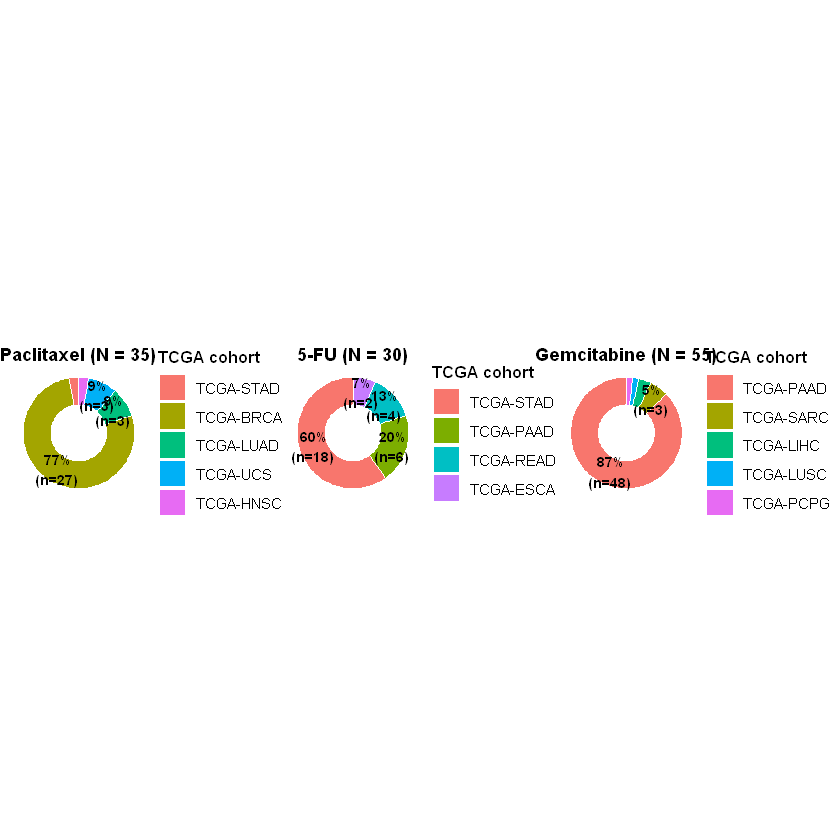

In [10]:
# 1) Percentages per drug with conditional labels
counts <- summary_counts %>%
  filter(!is.na(project), !is.na(drug)) %>%
  group_by(drug) %>%
  mutate(
    p = n / sum(n),
    pct_round = paste0(round(p * 100), "%"),
    label = ifelse(p >= 0.05, paste0(pct_round, "\n(n=", n, ")"), ""),  # show only if ≥5%
    project = fct_reorder(project, n, .desc = TRUE)
  ) %>%
  ungroup()

# 2) Donut chart builder (one per drug)
make_donut <- function(df, title){
  total_n <- sum(df$n, na.rm = TRUE)  # total cohort count for that drug
  title_full <- paste0(title, " (N = ", total_n, ")")
    
  ggplot(df, aes(x = 2, y = p, fill = project)) +
    geom_col(width = 1, color = "white") +
    coord_polar(theta = "y") +
    xlim(0.5, 2.5) +
    geom_text(aes(label = label),
              position = position_stack(vjust = 0.5), size = 3, fontface = "bold" 
) +
    labs(title = title_full, fill = "TCGA cohort") +
    theme_void(base_size = 11) +
    theme(
        plot.title = element_text(hjust = 0.5, size = 11, face = "bold"),
        legend.title = element_text(size = 10, face = "bold"),  

    )
}

p_pac <- make_donut(filter(counts, drug == "paclitaxel"),   "Paclitaxel")
p_5fu <- make_donut(filter(counts, drug == "fluorouracil"), "5-FU")
p_gem <- make_donut(filter(counts, drug == "gemcitabine"),  "Gemcitabine")

# 3) 1×3 grid
p_pac + p_5fu + p_gem + plot_layout(ncol = 3)
final_plot <- p_pac + p_5fu + p_gem + plot_layout(ncol = 3)

# 4) Save
ggsave(
  filename = file.path(root_dir, "Figure13.jpeg"),
  plot = final_plot,
  width = 12, height = 3, dpi = 300
)